# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sub-01_ses-anatomy_T1w.nii.gz to sub-01_ses-anatomy_T1w.nii.gz


## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [13]:
file_path = list(uploaded.keys())[0]
x=nib.load(file_path)
print(f" x is : {x}")
mri = x.get_fdata()
print('MRI Shape:', mri.shape)

 x is : 
<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 208)
affine:
[[ -0.          -0.          -1.         103.5       ]
 [ -0.98419559   0.17708471  -0.          98.95184326]
 [ -0.17708471  -0.98419559   0.         126.85211182]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  3 256 256 208   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.    1.    1.    1.    2.25  1.    1.    1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0

shape (256, 256, 208)
axis codes (world axes): ('P', 'I', 'L')


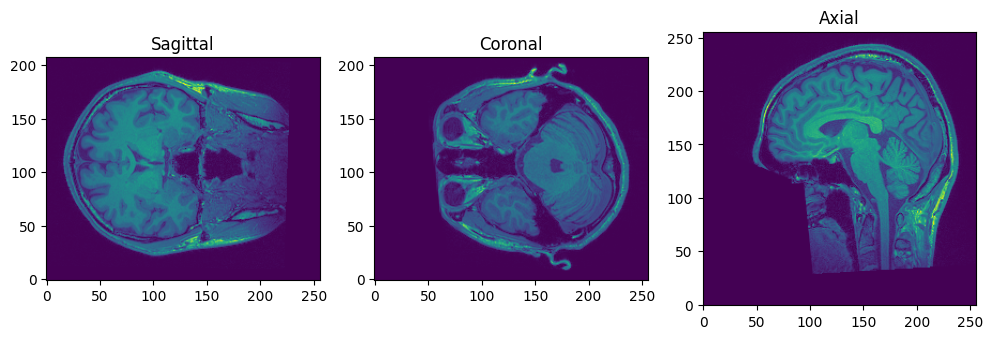

In [29]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nibabel.orientations import aff2axcodes, io_orientation

img = x        # Nifti1Image
data = x.get_fdata()                # float64 array (X, Y, Z)
affine = x.affine

print('shape', data.shape)
print('axis codes (world axes):', aff2axcodes(affine))  # e.g. ('R','A','S')

# choose center indices
x_mid = data.shape[0] // 2  # sagittal
y_mid = data.shape[1] // 2  # coronal
z_mid = data.shape[2] // 2  # axial

# extract
sagittal = data[x_mid, :, :]
coronal  = data[:, y_mid, :]
axial    = data[:, :, z_mid]

# show with correct orientation for human reading
fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].imshow(np.rot90(sagittal), origin='lower')  # rotate so anatomical orientation looks right
axes[0].set_title('Sagittal')
axes[1].imshow(np.rot90(coronal), origin='lower')
axes[1].set_title('Coronal')
axes[2].imshow(np.rot90(axial), origin='lower')
axes[2].set_title('Axial')
plt.show()


In [11]:
list(uploaded.keys())[0]

'sub-01_ses-anatomy_T1w.nii.gz'

## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

In [17]:
mri.shape[2] // 2

104

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

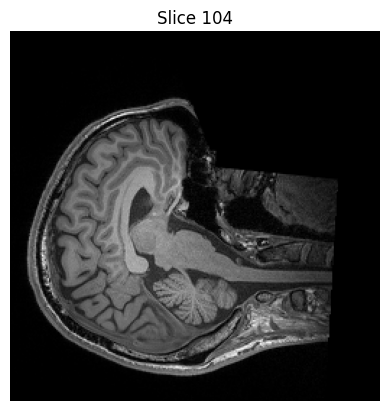

In [18]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [6]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

208

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

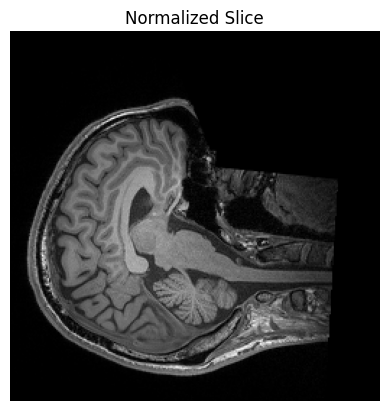

In [7]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

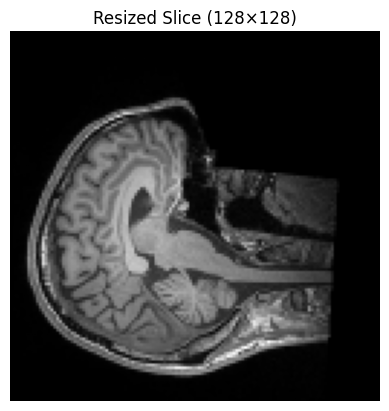

In [8]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.
4. Resize all slices to 128×128 and count how many slices contain tumor pixels (if mask available).


In [31]:
from google.colab import files
uploaded = files.upload()

Saving sub-01_ses-perceptionNaturalImageTest01_task-perception_run-01_bold.nii.gz to sub-01_ses-perceptionNaturalImageTest01_task-perception_run-01_bold.nii.gz


In [32]:
path =list(uploaded.keys())[0]
data = nib.load(path)
x = data.get_fdata()


In [35]:
x.shape

(96, 96, 76, 239)

In [36]:
data.shape

(96, 96, 76, 239)

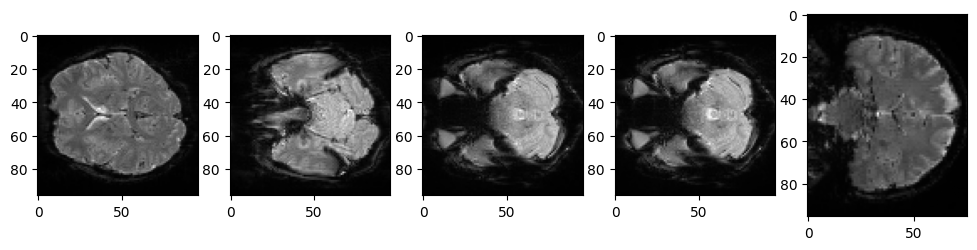

In [49]:
fig, axes = plt.subplots(1,5, figsize=(12,4))

axes[0].imshow(x[:, :, x.shape[2]//2,1],cmap='grey')
axes[1].imshow(x[:, :, x.shape[2]//3,1],cmap='grey')
axes[2].imshow(x[:, :, x.shape[2]//4,1],cmap='grey')
axes[3].imshow(x[:, :, x.shape[2]//4,100],cmap='grey')
axes[4].imshow(x[:, 96//2, :,1],cmap='grey')

In [ ]:
def plot_slices(volume, indices):
  # 1) Convert to NumPy array if needed
    if hasattr(volume, "get_fdata"):
        arr = volume.get_fdata()
    else:
        arr = np.asarray(volume)

    # 2) If 4D (e.g., fMRI), take the first timepoint
    if arr.ndim == 4:
        arr = arr[..., 0]

    # 3) Check dimensions
    if arr.ndim != 3:
        raise ValueError(f"Expected 3D volume, got shape {arr.shape}")

    # 4) Validate slice numbers
    max_slice = arr.shape[2] - 1
    for idx in indices:
        if idx < 0 or idx > max_slice:
            raise ValueError(f"Slice index {idx} is out of range (0–{max_slice})")

    # 5) Plot slices
    fig, axes = plt.subplots(1, len(indices), figsize=(4*len(indices), 4))

    if len(indices) == 1:
        axes = [axes]

    for ax, k in zip(axes, indices):
        sl = arr[:, :, k]  # axial slice
        ax.imshow(np.rot90(sl), cmap=cmap, origin='lower')
        ax.set_title(f"Slice {k}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
def resize():
  resized = tf.image.resize(norm_slice[..., None], (128, 128))
  plt.imshow(resized.numpy().squeeze(), cmap='gray')
  plt.title('Resized Slice (128×128)')
  plt.axis('off')